In [35]:
import sys

sys.path.append("../src")

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.integrate import quad
from scipy.optimize import minimize
import sto_ng
import overlap_function
import h5py

importlib.reload(sto_ng)
importlib.reload(overlap_function)
from sto_ng import *
from overlap_function import *

In [60]:
with h5py.File("sto_ng.h5", "r") as f:
    optimized_params_1s = f["1s/sto-3g/optimized_params"][:]
    optimized_params_2s2p = f["2s2p/sto-2g/optimized_params"][:]

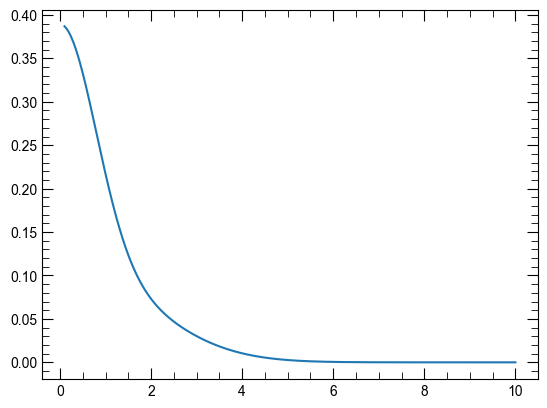

In [61]:
approximator = GaussianApproximator1s(optimized_params_1s, 1.0)
r = np.linspace(0.1, 10, 1000)
y = approximator.phi_approx_g1s(optimized_params_1s, r)
fig, ax = plt.subplots()
ax.plot(r, y)

In [62]:
optimized_params_1s

array([8.51761539e-01, 4.30165617e-01, 2.16840434e-19, 4.21840235e-01,
       1.51610304e-01, 6.78882237e-01])

In [66]:
def energy(scale):
    result = 0
    for i in range(3):
        for j in range(3):
            alpha_i = optimized_params_1s[2 * i] * scale**2
            alpha_j = optimized_params_1s[2 * j] * scale**2
            c_i = optimized_params_1s[2 * i + 1]
            c_j = optimized_params_1s[2 * j + 1]
            result += c_i * c_j * (T(alpha_i, alpha_j) + V(alpha_i, alpha_j))
    return result

In [67]:
minimize(energy, 1.0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.48115914822010436
        x: [ 1.003e+00]
      nit: 2
      jac: [-3.725e-09]
 hess_inv: [[ 1.046e+00]]
     nfev: 6
     njev: 3

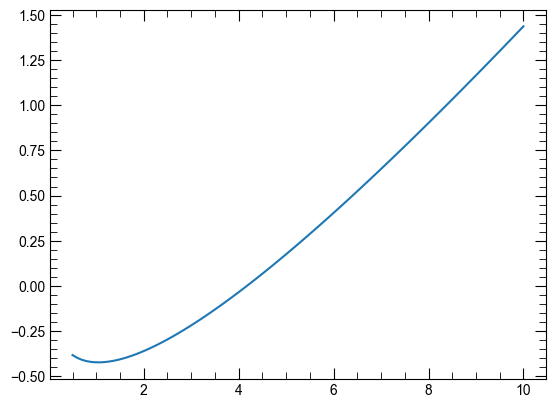

In [54]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.5, 10, 100), results)

In [40]:
optimized_params_1s[0] * optimized_params_1s[1]

0.2709540322477019

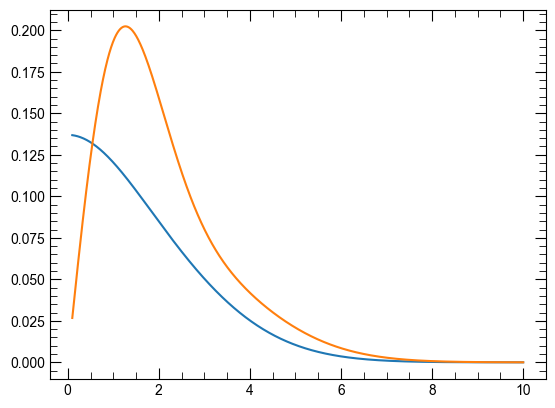

In [41]:
approximator = GaussianApproximator2s2p(optimized_params_2s2p, 1.0)
r = np.linspace(0.1, 10, 1000)
y2s = approximator.phi_approx_g1s(optimized_params_2s2p, r)
y2p = approximator.phi_approx_g2p(optimized_params_2s2p, r)
fig, ax = plt.subplots()
ax.plot(r, y2s)
ax.plot(r, y2p)